In [14]:
#we get the library that we'll use in these activities 
import numpy as np
import matplotlib.pyplot as plt
import random
import unittest
import math as m

# Percepton have all the basics formulas from this type of neuron (perceptron)
# x1: is the first input
# x2: is the second input
class Perceptron():
    def __init__(self,x1,x2):
        self.x1=x1
        self.x2=x2
    
    # op do the operation between the inputs and the weights
    # w1: is the weight for the first input
    # w2: is the weight for the second input
    # bias: is the bias
    def op(self,w1,w2,bias):
        return self.x1*w1+self.x2*w2+bias
    
    # discriminador decide the value of the output
    # w1: is the weight for the first input
    # w2: is the weight for the second input
    # bias: is the bias
    def discriminador(self,w1,w2,bias):
        ans=self.op(w1,w2,bias)
        if(ans>0):
            return 1
        else:
            return 0
        
    # AND do the behavior of the logical operation 'AND' for binary inputs
    def AND(self):
        return self.discriminador(1,1,-1.5)
    
    # OR do the behavior of the logical operation 'OR' for binary inputs
    def OR(self):
        return self.discriminador(1,1,-0.5)
    
    # NAND do the behavior of the logical operation 'NAND' for binary inputs
    def NAND(self):
        return self.discriminador(-1,-1,1.5)

    

In [15]:
#This is the test of the logicals operations
class PerceptronTest(unittest.TestCase):
    
    def test_AND(self):
        self.assertEqual(Perceptron(0,0).AND(),0,'Should be 0')
        self.assertEqual(Perceptron(0,1).AND(),0,'Should be 0')
        self.assertEqual(Perceptron(1,0).AND(),0,'Should be 0')
        self.assertEqual(Perceptron(1,1).AND(),1,'Should be 1')
    
    def test_OR(self):
        self.assertEqual(Perceptron(0,0).OR(),0,'Should be 0')
        self.assertEqual(Perceptron(0,1).OR(),1,'Should be 1')
        self.assertEqual(Perceptron(1,0).OR(),1,'Should be 1')
        self.assertEqual(Perceptron(1,1).OR(),1,'Should be 1')
        
        
    def test_NAND(self):
        self.assertEqual(Perceptron(0,0).NAND(),1,'Should be 1')
        self.assertEqual(Perceptron(0,1).NAND(),1,'Should be 1')
        self.assertEqual(Perceptron(1,0).NAND(),1,'Should be 1')
        self.assertEqual(Perceptron(1,1).NAND(),0,'Should be 0')
    
if __name__ == '__main__':
    unittest.main(argv=['ignored', '-v'], exit=False)
        
    

test_AND (__main__.PerceptronTest) ... ok
test_NAND (__main__.PerceptronTest) ... ok
test_OR (__main__.PerceptronTest) ... ok
test_AND (__main__.SigmoidTest) ... ok
test_NAND (__main__.SigmoidTest) ... ok
test_OR (__main__.SigmoidTest) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.005s

OK


In [16]:
# LearningPerceptron do the actualization of the weights of the perceptron
# ite: is the amount of iteration that we decide
# lr: is the learning rate of the actualization
class LearningPerceptron:
    def __init__(self,ite,lr):
        self.ite=ite
        self.lr=lr
        self.bias=random.uniform(-2,2)
        self.w1=random.uniform(-2,2)
        self.w0=random.uniform(-2,2)
    
    # functionToGet is the desire function to get
    # x: is the input
    def functionToGet(self,x):
        return -2*x-3
    
    # createNeuron make a new neuron
    # x1: is the input
    # x2: is the second input
    def createNeuron(self,x1,x2):
        return Perceptron(x1,x2)
    
    # learn update the weight
    def learn(self):
        for i in range(0,self.ite):
            a=random.uniform(-25,25)
            b=random.uniform(-25,25)
            neuron=self.createNeuron(a,b)
            designedOutput=neuron.discriminador(self.w0,self.w1,self.bias)
            
            if(b>self.functionToGet(a)):
                desiredOutput=1
            else:
                desiredOutput=0
            
            diff=desiredOutput-designedOutput
            self.w0=self.w0+self.lr*a*diff
            self.w1=self.w1+self.lr*b*diff
            self.bias=self.bias+self.lr*diff
    
    # prediction return the prediction of the model
    # x_test: is the first input
    # y_test: is the second input
    def prediction(self,x_test,y_test):
        p=self.createNeuron(x_test,y_test)
        return p.discriminador(self.w0,self.w1,self.bias)
        
    # getW return the weights     
    def getW(self):
        return [self.w0,self.w1]
    
    # getBias return the bias 
    def getBias(self):
        return self.bias

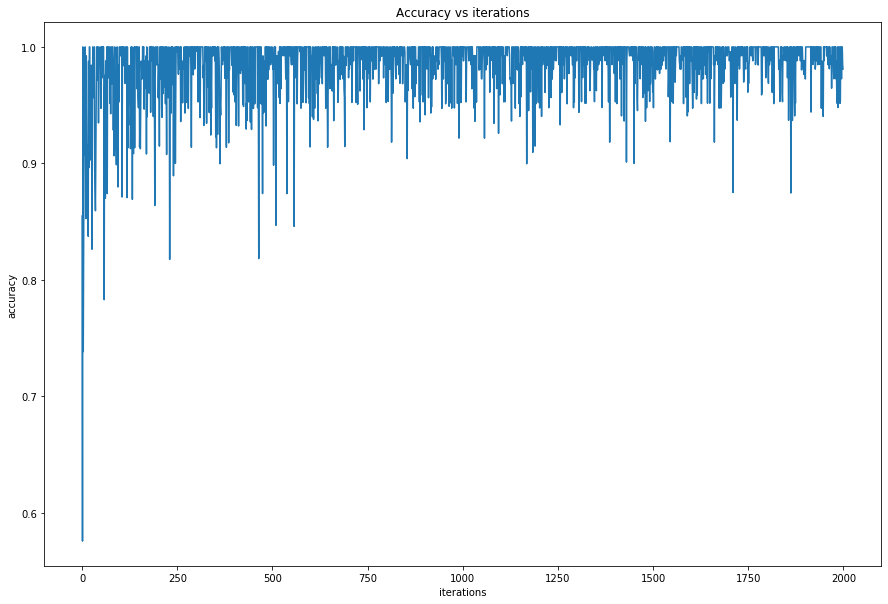

In [17]:
# PlotResults create random values in a range, a see the performance of the perceptron model
class PlotResults:
    
    # fun return the output of a input in the desire function
    # x: is the input
    def fun(self,x):
        return -2*x-3
    
    # pred return the class of the input in the function
    # x: is the input
    # y: is the value to compare
    def pred(self,x,y):
        if(self.fun(x)<y):
            return 1
        else:
            return 0
        
    # createLearn make a learn class of the perceptron
    # ite: is the iterations
    # lr: is the learning rate   
    def createLearn(self,ite,lr):
        return LearningPerceptron(ite,lr) 
    
    # porcentaje return the percentage of a total
    # calculate: is the value to calculate the percentage
    # total: is the total to compare
    def porcentaje(self,calculate,total):
        if(total==0):
            return 0
        else:
            return calculate/total
    
    # createPlot return the learning plot
    # learning: is the learning rate
    # maxIte: is the total iterations to do
    def createPlot(self,learning,maxIte):
        x_test=[]
        y_test=[]
        lr=learning
        rangeMax=500

        for i in range(0,rangeMax):
            first=random.uniform(-25,25)
            second=random.uniform(-25,25)
            x_test.append(first)
            y_test.append(second)

        precision=[]
        for j in range(0,maxIte,1):
            c_predTotal=0
            prec=0
            le=self.createLearn(j,lr)
            le.learn()
            for k in range(0,rangeMax):
                c_prediction=le.prediction(x_test[k],y_test[k])
                c_real=self.pred(x_test[k],y_test[k])
                if(c_prediction==1):
                    c_predTotal+=1
                    if(c_prediction==c_real):
                        prec+=1
            precision.append(self.porcentaje(prec,c_predTotal))

        plt.figure(figsize=(15,10))
        plt.plot(np.arange(0,maxIte,1),precision)
        plt.xlabel('iterations')
        plt.ylabel('accuracy')
        plt.title('Accuracy vs iterations')
PerceptronPlot=PlotResults()
PerceptronPlot.createPlot(0.1,2000)

In [18]:
# SigmoidNeuron have all the basics formulas from this type of perceptron neuron and the activation function
# x1: is the first input
# x2: is the second input

class SigmoidNeuron(Perceptron):
    def __init__(self,x1,x2):
        super().__init__(x1,x2)
    
    # function represents the activation function
    # x: is the input
    def function(self,x):
        return 1/(1+np.exp(-x))
    
    # op do the operation between the inputs and the weights and apply de activation function
    # w1: is the weight for the first input
    # w2: is the weight for the second input
    # bias: is the bias
    def op(self,w1,w2,bias):
        s=super().op(w1,w2,bias)
        return self.function(s)
    
    # discriminador decide the value of the output
    # w1: is the weight for the first input
    # w2: is the weight for the second input
    # bias: is the bias
    def discriminador(self,w1,w2,bias):
        ans=self.op(w1,w2,bias)
        if(ans>0.5):
            return 1
        else:
            return 0

        

In [19]:
#This is the test of the logicals operations
class SigmoidTest(unittest.TestCase):

    def test_AND(self):
        self.assertEqual(SigmoidNeuron(0,0).AND(),0,'Should be 0')
        self.assertEqual(SigmoidNeuron(0,1).AND(),0,'Should be 0')
        self.assertEqual(SigmoidNeuron(1,0).AND(),0,'Should be 0')
        self.assertEqual(SigmoidNeuron(1,1).AND(),1,'Should be 1')
    
    def test_OR(self):
        self.assertEqual(SigmoidNeuron(0,0).OR(),0,'Should be 0')
        self.assertEqual(SigmoidNeuron(0,1).OR(),1,'Should be 1')
        self.assertEqual(SigmoidNeuron(1,0).OR(),1,'Should be 1')
        self.assertEqual(SigmoidNeuron(1,1).OR(),1,'Should be 1')
        
        
    def test_NAND(self):
        self.assertEqual(SigmoidNeuron(0,0).NAND(),1,'Should be 1')
        self.assertEqual(SigmoidNeuron(0,1).NAND(),1,'Should be 1')
        self.assertEqual(SigmoidNeuron(1,0).NAND(),1,'Should be 1')
        self.assertEqual(SigmoidNeuron(1,1).NAND(),0,'Should be 0')
    
if __name__ == '__main__':
    unittest.main(argv=['ignored', '-v'], exit=False)

test_AND (__main__.PerceptronTest) ... ok
test_NAND (__main__.PerceptronTest) ... ok
test_OR (__main__.PerceptronTest) ... ok
test_AND (__main__.SigmoidTest) ... ok
test_NAND (__main__.SigmoidTest) ... ok
test_OR (__main__.SigmoidTest) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.007s

OK


In [20]:
# LearningSigmoidNeuron do the actualization of the weights of the Sigmoid perceptron
# ite: is the amount of iteration that we decide
# lr: is the learning rate of the actualization
class LearningSigmoidNeuron(LearningPerceptron):
    def __init__(self,ite,lr):
        super().__init__(ite,lr)
        
    # createNeuron make a new neuron
    # x1: is the input
    # x2: is the second input
    def createNeuron(self,x1,x2):
        return SigmoidNeuron(x1,x2)

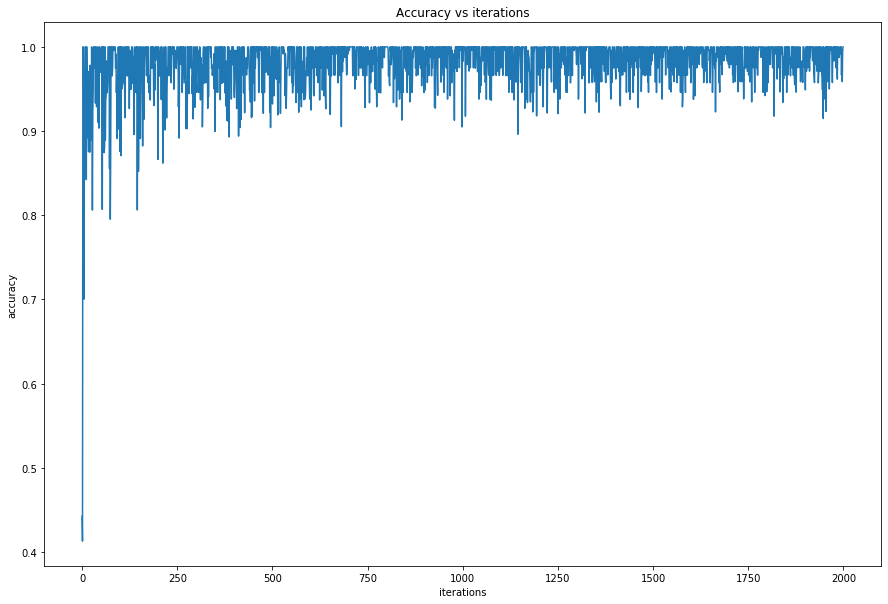

In [21]:
# PlotResultsSigmoid create random values in a range, a see the performance of the Sigmoid model
class PlotResultsSigmoid(PlotResults):
    
    # createLearn make a learn class of the Sigmoid
    # ite: is the iterations
    # lr: is the learning rate 
    def createLearn(self,ite,lr):
        return LearningSigmoidNeuron(ite,lr) 

sigmoidPlot=PlotResultsSigmoid()
sigmoidPlot.createPlot(0.1,2000)